## DAT19 Lab 07
## Logistic Regression Classification

Import the usual packages

In [1]:
import numpy as np
import pandas as pd

from bokeh.plotting import figure,show,output_notebook
from bokeh.models import Range1d

from sklearn import datasets
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

output_notebook()
%matplotlib inline

Loading BokehJS ...

Here are a couple pandas settings to make viewing the data a little easier

In [2]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

#### Load the Iris Data Set

In [3]:
from sklearn import datasets

sk_iris = datasets.load_iris()
iris = pd.DataFrame(sk_iris.data,columns=sk_iris['feature_names'])
iris['target'] = sk_iris.target
Names = sk_iris.target_names

#### Logistic Regression is a binary classifier so we'll just use two classes of the data set

In [4]:
iris = iris[iris.target!=0]

In [5]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


This is the standard cross validation function we can use to get a score on our models

In [6]:
from sklearn.cross_validation import cross_val_score

### Create an instance of a Logistic Regression model and apply cross-validation
#### (Note: C parameter is for regularization, also known as our complexity penalty)

In [7]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(C=1)

In [8]:
features = iris.drop('target',axis=1)
target = iris.target

In [9]:
cross_val_score(model_lr,features,target,cv=3).mean()

0.9601715686274509

### Review the feature importance


In [10]:
model_lr = LogisticRegression(C=1).fit(features, target)

x = np.arange(len(features.columns))
names = features.columns
names

Index([u'sepal length (cm)', u'sepal width (cm)', u'petal length (cm)',
       u'petal width (cm)'],
      dtype='object')

OR = e^Beta and the betas are the model coefficients.

In [11]:
print model_lr.coef_
print model_lr.coef_.ravel()

[[-1.70690955 -1.53277945  2.46921149  2.5563083 ]]
[-1.70690955 -1.53277945  2.46921149  2.5563083 ]


In [12]:
p = figure(title="Model Coefficients")
for val in x:
    p.quad(top=model_lr.coef_.ravel()[val], 
           bottom=0, left=val+0.2,right=val+0.8, 
           color=['red','orange','green','purple'][val],
           legend=names[val]
          )
    
p.y_range = Range1d(min(model_lr.coef_.ravel())-0.1, max(model_lr.coef_.ravel())+1.5)
show(p)


#### Exercise 1: Try Changing the Normalization and see how the Coeficients Change and Discuss with your Neighbor

In [13]:
p = figure(title="Model Coefficients")
for val in x:
    p.quad(top=model_lr.coef_.ravel()[val], 
           bottom=0, left=val+0.2,right=val+0.8, 
           color=['red','orange','green','purple'][val],
           legend=names[val]
          )
show(p)

## Example 2: Build Logistic Regression Classifier for Spambase Data

#### Load the spambase.csv as a pandas DataFrame (last column of data contains Target Data - is_spam)

In [14]:
spam_data = pd.read_csv("../data/spambase.csv")
# spam_data.head()
spam_data.describe()
# spam_data.info()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

Separate features from the rest of the data to use in our algorithms

In [15]:
features = spam_data.drop('is_spam',axis=1)
target = spam_data.is_spam

#features.head()
target.head()

0    1
1    1
2    1
3    1
4    1
Name: is_spam, dtype: int64

Convert DataFrames into numpy arrays

In [16]:
features.values

array([[  0.00000000e+00,   6.40000000e-01,   6.40000000e-01, ...,
          3.75600000e+00,   6.10000000e+01,   2.78000000e+02],
       [  2.10000000e-01,   2.80000000e-01,   5.00000000e-01, ...,
          5.11400000e+00,   1.01000000e+02,   1.02800000e+03],
       [  6.00000000e-02,   0.00000000e+00,   7.10000000e-01, ...,
          9.82100000e+00,   4.85000000e+02,   2.25900000e+03],
       ..., 
       [  3.00000000e-01,   0.00000000e+00,   3.00000000e-01, ...,
          1.40400000e+00,   6.00000000e+00,   1.18000000e+02],
       [  9.60000000e-01,   0.00000000e+00,   0.00000000e+00, ...,
          1.14700000e+00,   5.00000000e+00,   7.80000000e+01],
       [  0.00000000e+00,   0.00000000e+00,   6.50000000e-01, ...,
          1.25000000e+00,   5.00000000e+00,   4.00000000e+01]])

#### Use crossvalidation to score model

In [17]:
from sklearn.linear_model import LogisticRegression

features = spam_data.drop('is_spam',axis=1)
target = spam_data.is_spam

model_lr = LogisticRegression(C=1)

In [18]:
cross_val_score(model_lr,features,target,cv=3).mean()

0.90392784722355035

### Compare Performance of Logistic Regression to KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(3)
cross_val_score(model_knn,features,target,cv=3).mean()

0.76744526674471791

#### Exercise 2: Try testing and plotting CV Scores with different C values

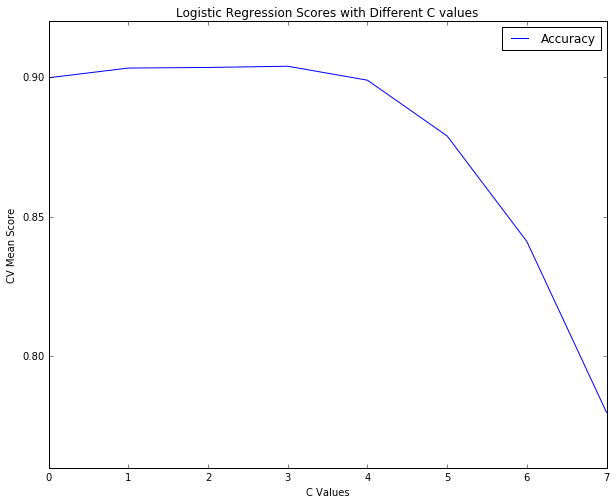

In [20]:
from sklearn.linear_model import LogisticRegression

features = spam_data.drop('is_spam',axis=1)
target = spam_data.is_spam

c_list = [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
cv_scores = []

for c in c_list:
    model_lr = LogisticRegression(C=c)
    cv_scores.append(cross_val_score(model_lr,features,target,cv=3).mean())

    

lr_scores_df = pd.DataFrame(cv_scores, columns=["Accuracy"])
ax = lr_scores_df.plot(figsize=(10,8), title="Logistic Regression Scores with Different C values")
ax.set_xlabel("C Values")
ax.set_ylabel("CV Mean Score")

###  Evaluate Feature Importance

In [21]:
feature_names = spam_data.columns[:-1] # To remove IsSpam column
feature_names = feature_names[-10:] # To give us the last 10 features
model_lr = LogisticRegression(C=1).fit(features, target)



p = figure(title="Model Coefficients")

coefficients=model_lr.coef_.ravel()[-10:]

x = np.arange(len(feature_names))
for val in x:
    p.quad(top = coefficients[val], bottom=0, left=val+0.2,
           right=val+0.8, color=['red','orange','green','purple','blue','cyan','magenta','red','orange','purple'][val],legend=feature_names[val])
p.y_range = Range1d(min(coefficients)-0.1, max(coefficients)+1.5)
show(p)


### What if I want the most important features?

In [22]:
coeffs = pd.DataFrame(zip(spam_data.columns[:-1],model_lr.coef_.ravel()),columns=['features','coeff'])
coeffs.head()

,features,coeff
0,word_freq_make,-0.321621
1,word_freq_address,-0.157778
2,word_freq_all,0.142533
3,word_freq_3d,0.766415
4,word_freq_our,0.553787


In [23]:
coeffs['abs'] = np.absolute(coeffs.coeff.values)

coeffs.sort('abs',ascending=False)

/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,features,coeff,abs
52,char_freq_$,3.754544,3.754544
26,word_freq_george,-3.575337,3.575337
22,word_freq_000,2.194501,2.194501
6,word_freq_remove,2.181984,2.181984
41,word_freq_meeting,-1.851597,1.851597
24,word_freq_hp,-1.784099,1.784099
47,word_freq_conference,-1.477347,1.477347
45,word_freq_edu,-1.396319,1.396319
43,word_freq_project,-1.393291,1.393291
40,word_freq_cs,-1.353571,1.353571


### Data Normalization

In [24]:
features.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

#### Normalize all features in one line of code
This is the form of normalization where you normalize the standard deviation.

In [25]:
features_norm = (features - features.mean())/features.std()

In [26]:
features_norm.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03
mean,-1.783753e-15,1.614275e-15,-4.023346e-15,2.784820e-15,8.230647e-15,-5.586828e-16,3.989081e-15,1.908758e-15,-6.747265e-15,-4.863650e-16,-7.735245e-15,-4.079907e-16,-2.133095e-16,-1.792826e-15,3.423208e-16,-1.376956e-15,-9.962810e-15,8.625499e-15,-8.491843e-16,-7.161216e-15,-4.333525e-15,-1.802894e-15,6.944528e-15,-6.621391e-15,-2.366023e-15,1.812480e-15,1.068290e-14,-1.952880e-15,-2.474149e-15,4.298899e-15,-2.958692e-15,7.306334e-16,-6.568679e-16,2.525365e-15,4.102215e-15,-4.579314e-15,-1.054869e-15,3.646561e-16,3.368179e-15,-8.051832e-16,-1.681447e-15,2.037142e-15,-5.613733e-16,-1.299167e-15,-9.248561e-16,-5.659145e-15,2.008156e-15,-1.853953e-15,4.622036e-15,1.833617e-15,1.003568e-15,1.947692e-15,-4.775141e-15,9.066862e-17,-7.997780e-16,-7.724628e-16,-3.658838e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.423965e-01,-1.650540e-01,-5.567001e-01,-4.689449e-02,-4.642639e-01,-3.502281e-01,-2.917622e-01,-2.625330e-01,-3.232672e-01,-3.713240e-01,-2.968273e-01,-6.286443e-01,-3.120213e-01,-1.749082e-01,-1.900937e-01,-3.013449e-01,-3.211005e-01,-3.478381e-01,-9.361406e-01,-1.678749e-01,-6.743457e-01,-1.181587e-01,-2.901777e-01,-2.129712e-01,-3.287789e-01,-2.992074e-01,-2.278700e-01,-2.318050e-01,-1.667133e-01,-2.252150e-01,-1.605219e-01,-1.431965e-01,-1.749012e-01,-1.451994e-01,-1.980459e-01,-2.421039e-01,-3.234205e-01,-5.982973e-02,-1.808917e-01,-1.852837e-01,-1.208915e-01,-1.725812e-01,-2.059707e-01,-1.273295e-01,-2.977438e-01,-1.973660e-01,-7.138015e-02,-1.115341e-01,-1.584361e-01,-5.142507e-01,-1.551808e-01,-3.298764e-01,-3.083214e-01,-1.030372e-01,-1.321017e-01,-2.625709e-01,-4.655567e-01
25%,-3.423965e-0

We can also use the built in SKLearn Normalization

In [27]:
scaler = StandardScaler()
features_norm_2 = scaler.fit_transform(features)

pd.DataFrame(features_norm_2, columns=features.columns).head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.342434,0.330885,0.712859,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,-0.296860,0.114087,-0.312055,-0.174927,-0.190114,0.086171,-0.321135,2.081207,0.150905,-0.167893,0.125128,-0.118172,-0.290209,-0.212994,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.17492,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724
1,0.345359,0.051909,0.435130,-0.0469,-0.256117,0.672399,0.244743,-0.088010,-0.323302,1.086711,0.745206,0.288181,1.847391,0.451663,0.350812,-0.131825,-0.163480,0.179367,1.018370,-0.167893,0.649831,-0.118172,0.937491,0.758565,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.17492,-0.145215,-0.198067,-0.24213,-0.158129,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324
2,-0.145921,-0.165072,0.851723,-0.0469,1.364846,0.343685,0.193644,0.036670,1.974017,0.016422,1.588784,-0.106431,0.086612,-0.174927,6.571464,-0.228712,-0.186002,1.591624,-0.170169,0.459913,-0.249659,-0.118172,3.021726,-0.077428,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.17492,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.013815,-0.120905,-0.1726,0.330230,-0.127343,-0.238463,-0.131527,-0.071388,-0.111546,-0.117376,0.014684,-0.155198,0.008496,0.440053,-0.079754,0.145921,2.221106,3.258733
3,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,1.241428,-0.268919,0.717835,-0.174927,-0.190114,0.074061,-0.321135,-0.347876,0.855017,-0.167893,-0.416232,-0.118172,-0.290209,-0.212994,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.17492,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.007511,-0.155198,-0.161934,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222
4,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,1.241428,-0.268919,0.717835,-0.174927,-0.190114,0.074061,-0.321135,-0.347876,0.855017,-0.167893,-0.416232,-0.118172,-0.290209,-0.212994,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.17492,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.014910,-0.155198,-0.164387,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222


In [28]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(C=1)

cross_val_score(model_lr,features_norm, target,cv=3 ).mean()

0.90197203329147457

#### Chart last 10 features and compare with earlier coefficients

In [29]:
feature_names = spam_data.columns[:-1]

feature_names = feature_names[-11:]
feat_norm_val = features_norm.values
model_lr = LogisticRegression(C=1).fit(feat_norm_val, target)

p = figure(title="Model Coefficients")

coefficients=model_lr.coef_.ravel()[-11:]

x = np.arange(len(feature_names))
for val in x:
    p.quad(top = coefficients[val], bottom=0, left=val+0.2,
           right=val+0.8, 
           color=['red','orange','green','purple','blue','cyan','magenta','red','orange','purple','blue','green'][val],
           legend=feature_names[val])
    p.legend.orientation = "top_left"
p.y_range = Range1d(min(coefficients)-0.1, max(coefficients)+2.5)
show(p)


/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/bokeh/core/properties.py:714: BokehDeprecationWarning: bokeh.models.annotations.orientation was deprecated in Bokeh 0.11; please use Legend.location instead
  super(HasProps, self).__setattr__(name, value)
/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/bokeh/core/properties.py:714: BokehDeprecationWarning: bokeh.models.annotations.orientation was deprecated in Bokeh 0.11; please use Legend.location instead
  super(HasProps, self).__setattr__(name, value)
/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/bokeh/core/properties.py:714: BokehDeprecationWarning: bokeh.models.annotations.orientation was deprecated in Bokeh 0.11; please use Legend.location instead
  super(HasProps, self).__setattr__(name, value)
/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/bokeh/core/properties.py:714: BokehDeprecationWarning: bokeh.models.annotations.orientation was deprecated in Bokeh 0.11; please use Legend.location i

### Exercise 3:
Using what we know in a real life example:

Bank Marketing!

Load the bank.csv file and using the column `y` as your target, determine feature importance of convincing someone to buy a term deposit. For more background: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Outcomes:
1. Identify most predictive features and explain why they do (or do not?) make sense.
2. Discuss with your neighbor which features you could use in crafting an outreach plan for marketing purposes.
3. What would you tell the Chief Marketing Officer? Can you quantify the improvement?

In [30]:
bank = pd.read_csv("../data/bank.csv")
bank.head()
#bank.info()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no
1,33,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no
2,35,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no
3,30,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no
4,59,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no


HINT: Convert the columns that are binary to 0 or 1 using .map()

In [31]:
#Define a dictionary that will map a value to a string in a pandas column
married_mapping = {'married':0,'single':1,'divorced':1}
# use .map() on the column
bank['marital']=bank['marital'].map(married_mapping)
#bank['marital']

housing_mapping = {'no':0,'yes':1}
loan_mapping = {'no':0,'yes':1}
y_mapping = {'no':0,'yes':1}
education_mapping = {'unknown':0,'primary':1, 'secondary':1, 'tertiary':1}
contact_mapping = {'unknown':0,'cellular':1, 'telephone':1}
poutcome_mapping = {'unknown':0,'other':0, 'failure':0, 'success':1}
default_mapping = {'no':0,'yes':0}

bank['housing']=bank['housing'].map(housing_mapping)
bank['loan']=bank['loan'].map(loan_mapping)
bank['y']=bank['y'].map(y_mapping)
bank['education']=bank['education'].map(education_mapping)
bank['contact']=bank['contact'].map(contact_mapping)
bank['poutcome']=bank['poutcome'].map(poutcome_mapping)
bank['default']=bank['default'].map(default_mapping)

In [32]:
bank_feature_names = bank.columns[:-1]
bank_features = bank.drop('y',axis=1)
bank_target = bank.y

bank_model_lr = LogisticRegression(C=1).fit(bank_features, bank_target)

feature_importance_lr = pd.DataFrame({'feature':bank_feature_names, 'importance':bank_model_lr.coef_.ravel()})
top10 = feature_importance_lr[feature_importance_lr.importance != 0].sort('importance', ascending=False).head(10)
print top10

p = figure(title="Model Coefficients")

coefficients=bank_model_lr.coef_.ravel()

x = np.arange(len(bank_feature_names))
for val in x:
    p.quad(top = coefficients[val], bottom=0, left=val+0.2,
           right=val+0.8, color=['red','orange','green','purple','blue','cyan','magenta','red','orange','purple','red','orange','green'][val],legend=bank_feature_names[val])
    p.legend.orientation = "top_left"
p.y_range = Range1d(min(coefficients)-0.1, max(coefficients)+1.5)

show(p)

/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/bokeh/core/properties.py:714: BokehDeprecationWarning: bokeh.models.annotations.orientation was deprecated in Bokeh 0.11; please use Legend.location instead
  super(HasProps, self).__setattr__(name, value)
/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/bokeh/core/properties.py:714: BokehDeprecationWarning: bokeh.models.annotations.orientation was deprecated in Bokeh 0.11; please use Legend.location instead
  super(HasProps, self).__setattr__(name, value)
/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/bokeh/core/properties.py:714: BokehDeprecationWarning: bokeh.models.annotations.orientation was deprecated in Bokeh 0.11; please use Legend.location instead
  super(HasProps, self).__setattr__(name, value)
/Users/samuelbolivar/anaconda/lib/python2.7/site-p

      feature  importance
12   poutcome    2.230663
7     contact    0.922383
1     marital    0.259934
11   previous    0.039215
8    duration    0.003826
10      pdays    0.000875
4     balance    0.000006
0         age   -0.001271
9    campaign   -0.085358
2   education   -0.249370
